In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="white")

In [4]:
corr_MNR = pd.read_csv("../Data/Final/correlation_matrix_MNR.csv")
corr_Earl = pd.read_csv("../Data/Final/correlation_matrix_Earl.csv")

In [5]:
corr_MNR = corr_MNR.iloc[:,1:]
corr_Earl = corr_Earl.iloc[:,1:]

In [6]:
corr_MNR.index = corr_MNR.columns
corr_Earl.index = corr_MNR.columns

In [7]:
corr_MNR

,OFD_Expected,other,OFD,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,R_Sideline,...,weekday,week_no,country_code,station_code,fc_codes_0,fc_codes_1,fc_codes_2,fc_codes_3,fc_codes_4,fc_codes_5
OFD_Expected,1.000000,-0.196114,0.969790,0.982401,0.459840,0.523291,0.425386,0.232141,0.593163,0.070843,...,-0.214981,-0.060773,0.165254,0.615035,0.055964,0.018125,-0.178992,-0.018262,-0.096801,-0.215261
other,-0.196114,1.000000,-0.180966,-0.183832,-0.150969,-0.159168,-0.157671,-0.347974,-0.107830,-0.101579,...,-0.010271,0.043272,-0.091100,-0.190126,-0.060768,0.046864,-0.034695,0.045427,0.089573,0.050925
OFD,0.969790,-0.180966,1.000000,0.960787,0.461995,0.522613,0.425077,0.222006,0.590796,0.059895,...,-0.214435,-0.050742,0.158037,0.606966,0.047536,0.023120,-0.179771,-0.019821,-0.098675,-0.220748
Slam,0.982401,-0.183832,0.960787,1.000000,0.453621,0.539743,0.437324,0.204646,0.567776,0.051821,...,-0.186469,-0.060488,0.166776,0.619503,0.062548,0.014478,-0.183761,-0.016666,-0.096762,-0.222918
Earlies_Exp,0.459840,-0.150969,0.461995,0.453621,1.000000,0.641676,0.343068,0.205759,0.235830,0.023157,...,0.076385,-0.159243,0.441709,0.591792,0.273591,0.142292,-0.041081,-0.060555,-0.109561,-0.063290
Earlies_Rec,0.523291,-0.159168,0.522613,0.539743,0.641676,1.000000,0.358330,0.227854,0.307341,0.179963,...,-0.063584,-0.155561,0.445836,0.601747,0.278933,0.141756,-0.043937,-0.062511,-0.113363,-0.066132
MNR_SNR_Exp,0.425386,-0.157671,0.425077,0.437324,0.343068,0.358330,1.000000,0.250009,0.203188,0.046118,...,-0.079360,-0.018827,0.362924,0.518559,0.224775,0.045277,-0.049159,-0.060757,-0.059399,-0.071138
Rollover,0.232141,-0.347974,0.222006,0.204646,0.205759,0.227854,0.250009,1.000000,0.131284,0.093744,...,-0.085288,-0.028807,0.225431,0.309104,0.157626,0.021670,0.029049,-0.050160,-0.072276,-0.021774
Returns,0.593163,-0.107830,0.590796,0.567776,0.235830,0.307341,0.203188,0.131284,1.000000,0.259542,...,-0.121350,-0.017490,0.059599,0.353186,-0.253217,0.179943,-0.059073,-0.063197,-0.098685,-0.138320
R_Sideline,0.070843,-0.101579,0.059895,0.051821,0.023157,0.179963,0.046118,0.093744,0.259542,1.000000,...,-0.263013,0.010634,0.164039,0.161345,0.074738,-0.004693,0.008011,-0.000284,-0.011973,-0.060541


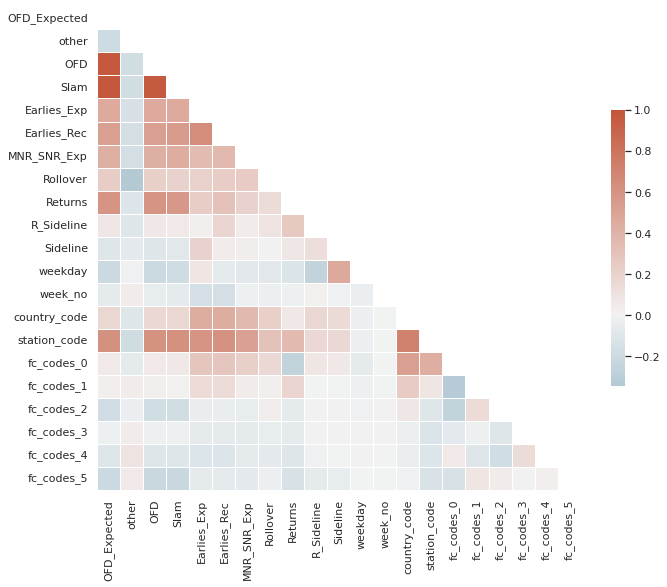

In [12]:
mask = np.triu(np.ones_like(corr_MNR, dtype=bool))
f, ax = plt.subplots(figsize=(10, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_MNR, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.tight_layout()
plt.savefig("correlation_MNR", format="png")

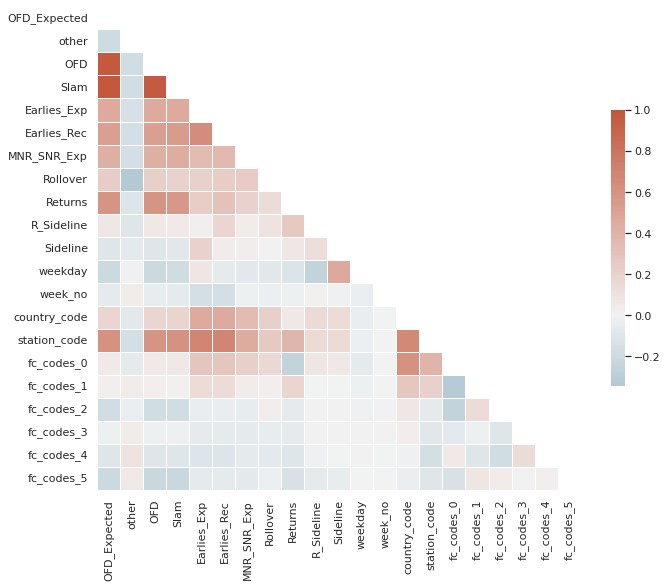

In [13]:
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corr_Earl, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.tight_layout()
plt.savefig("correlation_Earl", format="png")